### Report des stages et contrats pro ISEN promo 2017 
C'est un petit report, le temps d'une soiree.

DISCLAIMER : Il se peut qu'il y ai des erreur, des choses qu'on pourrait faire autrement.

_[Guillaume BERNARD](https://github.com/GBernard314)_

### 0. Importing libs

In [575]:
# !pip3 install matplotlib
# !pip3 install pandas
# !pip3 install numpy

In [576]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle, islice


### 1. Nettoyage data

#### Nettoyage Stage Application Ingenieur

In [591]:
sai = pd.read_csv('sai_RW.csv', index_col=False)
sai = sai.drop(columns='dp')
sai.sort_values(by='nom', ascending=True).drop(columns='nom').head()

,boite
23,EGERIE SOFTWARE
24,NAVAL GROUP
25,My Groom Service
26,NaN
27,CNIM ENVIRONNEMENT & ENERGIE EPC


#### Nettoyage Contrat Pro

In [592]:
cp = pd.read_csv('cp_rw.csv', index_col=False)
cp = cp.drop(columns=['nb', 'tuteur'])
cp.sort_values(by='nom', ascending=True).drop(columns='nom').head()

,boite
0,EGERIE SOFTWARE
1,NAVAL GROUP
2,My Groom Service
3,AXIOME Ingenierie
4,AGPM


On peut voir que la data est incomplete

In [579]:
print('incomplete SAI')
sai[sai['boite'].isnull()].count()

incomplete SAI


nom      13
boite     0
dtype: int64

Il y a au moins **13** cas de stages non complets

(By design, les infos des contrats pro. sont complets)

### 2. Architecting Data

#### Fusionner les Dataframes

In [593]:
year = cp.copy(deep=True)
year = year.merge(sai, how='right', left_on='nom', right_on='nom', suffixes=('_cp', '_sai'))
year.sort_values(by='nom').drop(columns='nom').head()

,boite_cp,boite_sai
23,EGERIE SOFTWARE,EGERIE SOFTWARE
24,NAVAL GROUP,NAVAL GROUP
25,My Groom Service,My Groom Service
26,NaN,NaN
27,NaN,CNIM ENVIRONNEMENT & ENERGIE EPC


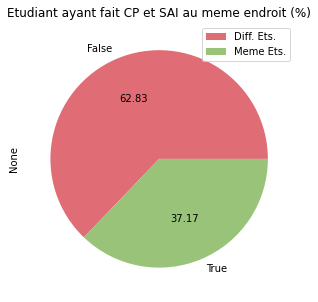

In [594]:
conditions = [year['boite_cp'] == year['boite_sai'],
              year['boite_cp'] != year['boite_sai']]
outputs = [True, False]
res = np.select(conditions, outputs, None)
year.groupby(res).size().plot.pie(figsize=(10,5), autopct='%.2f', fontsize=10, legend=False, colors=['#e06c75', '#98c379'])
plt.title('Etudiant ayant fait CP et SAI au meme endroit (%)')
plt.legend(['Diff. Ets.', 'Meme Ets.'])

#### Creation d'un Dataframe pour les Entreprises
Pour indexer, grouper plus facilement

In [583]:
all_boites = list( dict.fromkeys(list(year['boite_sai']) + list(year['boite_cp'])))

comp = pd.DataFrame({'company' : all_boites, 'sai': len(all_boites)*[0], 'cp' : len(all_boites)*[0]})
comp = comp.set_index(['company'])
for index, row in year.iterrows():
    comp.loc[row['boite_cp']]['cp'] += 1
    comp.loc[row['boite_sai']]['sai'] += 1


### 3. Visualisation

#### Top 3 des entreprises
En Contrat Pro.

In [584]:
comp.sort_values(by='cp', ascending=False)['cp'][1:4] # NaN is first

company
THALES DIS            12
SOPRA STERIA GROUP     8
NAVAL GROUP            5
Name: cp, dtype: int64

En Stage

In [585]:
comp.sort_values(by='sai', ascending=False)['sai'][1:4] # NaN is first

company
THALES DIS                       11
CAPGEMINI TECHNOLOGY SERVICES     4
NAVAL GROUP                       4
Name: sai, dtype: int64

#### Comparaisons
Nombre de Contrat Pro et Stage par entreprise

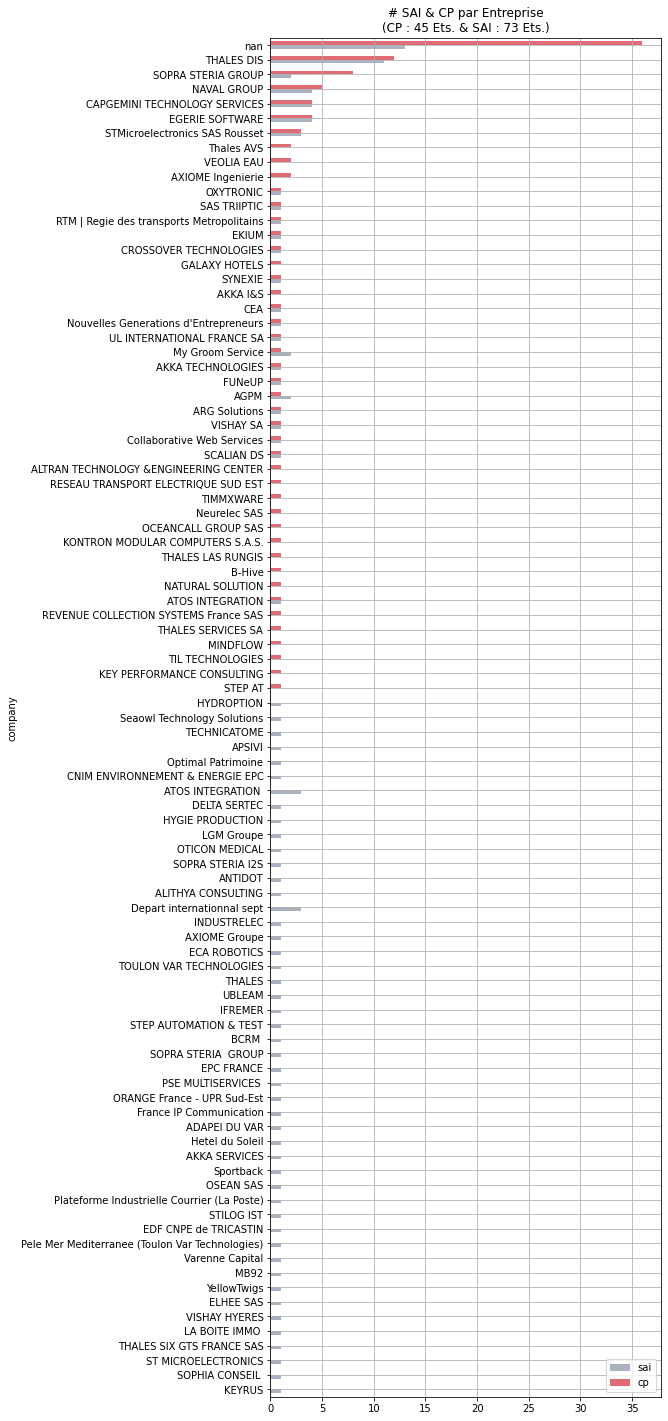

In [586]:
comp.sort_values(by='cp')[['sai', 'cp']].plot.barh(figsize=(7,25), grid=True, color=['#abb2bf', '#e06c75'])
nb_cp = comp[comp['cp'] > 0]['cp'].count()
nb_sai = comp[comp['sai'] > 0 ]['sai'].count()
plt.title(f'# SAI & CP par Entreprise\n(CP : {nb_cp} Ets. & SAI : {nb_sai} Ets.)')
plt.legend(['sai', 'cp'])

On peut voir qu'un nombre important d'etudiants :
- n'a pas de Contrat Pro (nan rouge)
- n'a pas de SAI (vu precedemment, nan gris)

Enfin, si vous voulez un stage et que cela decoule en CP :

Text(0.5, 1.0, 'Alternance apres un stage')

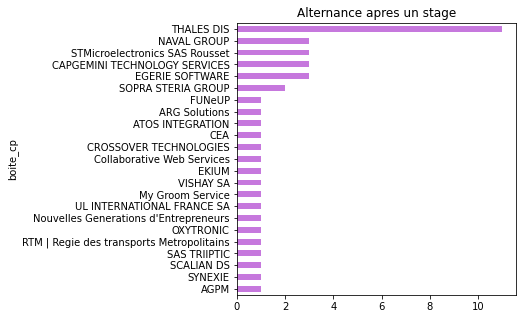

In [587]:
stayed = year[year['boite_cp'] == year['boite_sai']].groupby('boite_cp').size().sort_values()
stayed.plot.barh(figsize=(5,5), color='#c678dd')
plt.title('Alternance apres un stage')